In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

In [6]:
oht = xr.open_dataset('/disco/share/mh920/data_eocene/CESM1.2_CAM5-deepmip_sens_1xCO2-hfno-v1.0.mean.nc')

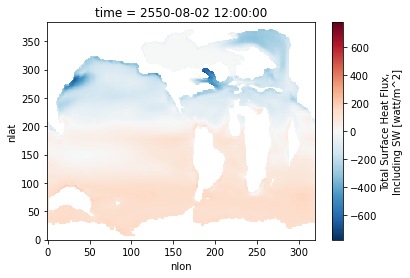

In [11]:
oht.hfno.isel(time=0).plot()

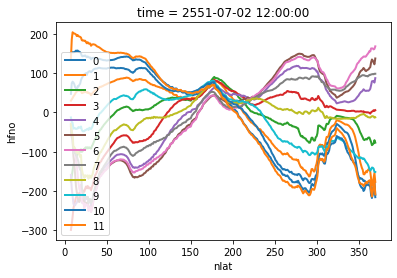

In [9]:
for n in range(12):
    oht.hfno.isel(time=n).mean('nlon').plot(lw=2,label=str(n))
plt.legend()

In [3]:
ctl_300 = xr.open_dataset('ctl_qflux_ice.nc',decode_times=False)
weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"

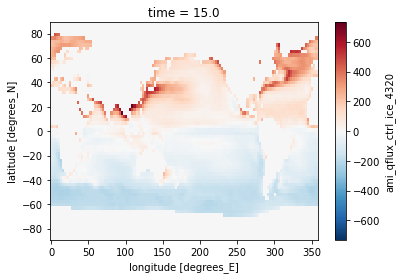

In [4]:
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=0).plot()

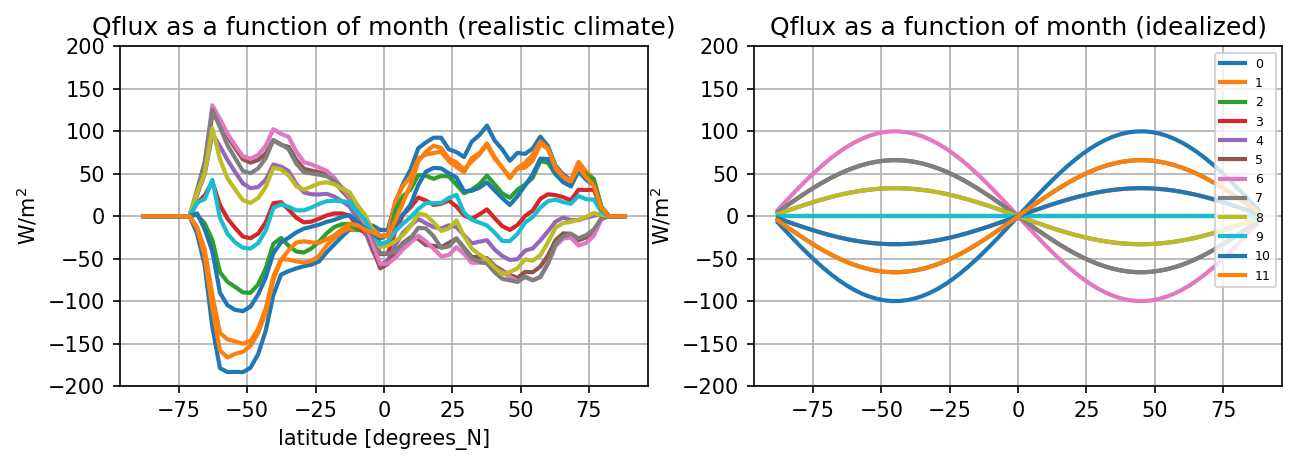

In [30]:
plt.figure(figsize=(10, 3),dpi=150)
plt.subplot(121)
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=0).mean('lon').plot(lw=2,label='0')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=1).mean('lon').plot(lw=2,label='1')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=2).mean('lon').plot(lw=2,label='2')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=3).mean('lon').plot(lw=2,label='3')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=4).mean('lon').plot(lw=2,label='4')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=5).mean('lon').plot(lw=2,label='5')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=6).mean('lon').plot(lw=2,label='6')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=7).mean('lon').plot(lw=2,label='7')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=8).mean('lon').plot(lw=2,label='8')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=9).mean('lon').plot(lw=2,label='9')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=10).mean('lon').plot(lw=2,label='10')
ctl_300.ami_qflux_ctrl_ice_4320.isel(time=11).mean('lon').plot(lw=2,label='11')
plt.ylabel('W/m$^2$')
plt.title('Qflux as a function of month (realistic climate)')
# plt.legend()
plt.ylim([-200,200])
plt.grid()

qflux = np.zeros((12,ctl_300.lat.shape[0]))
qflux[0,:]=np.sin(np.deg2rad(ctl_300.lat*2))*100
qflux[1,:]=np.sin(np.deg2rad(ctl_300.lat*2))*33
qflux[2,:]=np.sin(np.deg2rad(ctl_300.lat*2))*66
qflux[3,:]=np.sin(np.deg2rad(ctl_300.lat*2))*0
qflux[4,:]=np.sin(np.deg2rad(ctl_300.lat*2))*-33
qflux[5,:]=np.sin(np.deg2rad(ctl_300.lat*2))*-66
qflux[6,:]=np.sin(np.deg2rad(ctl_300.lat*2))*-100
qflux[7,:]=np.sin(np.deg2rad(ctl_300.lat*2))*-66
qflux[8,:]=np.sin(np.deg2rad(ctl_300.lat*2))*-33
qflux[9,:]=np.sin(np.deg2rad(ctl_300.lat*2))*0
qflux[10,:]=np.sin(np.deg2rad(ctl_300.lat*2))*33
qflux[11,:]=np.sin(np.deg2rad(ctl_300.lat*2))*66

plt.subplot(122)
for i in range(12):
    plt.plot(ctl_300.lat.values,qflux[i,:],lw=2,label=i)
plt.legend(fontsize=6)
plt.ylabel('W/m$^2$')
plt.title('Qflux as a function of month (idealized)')
plt.grid()
plt.ylim([-200,200])
plt.show()

In [6]:
ctl_300.ami_qflux_ctrl_ice_4320.mean(('lon','time')).weighted(weights).mean('lat')

<xarray.DataArray ()>
array(-0.00041554)